# TP 6 Réseaux de neurones - Multi classification et Propagation en arrière

Dans ce TP, nous aimerions entrainer un réseau de neurones pour la tâche de classification en utilisant l'algorithme d propagation en arrière (backpropagation).

L'ensemble de données que nous allons utiliser est le même que celui utilisé durant le TP1, i.e. les images de chiffres manuscrits.


# Importation des librairies necessaires au travail


In [55]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import cv2
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier


# Lecture des fichiers de données

Pour ce TP, nous allons lire les données à partir d'un fichier csv.


In [56]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=float)
data.shape


(5000, 401)

Dans ces données (data), les 400 premières colonnes representent les pixels de l'image (20x20), la dernière colonne represente la classe de l'image (chiffres de 0 à 9). (http://yann.lecun.com/exdb/mnist/)

Chaque ligne represente un exemple de notre ensemble de données.

Mettons ces données dans leus vecteurs correspondants.


In [57]:
# rajoutons l'ordonnée à l'origine theta 0
intercept = np.ones((data.shape[0], 1))
X = np.column_stack((intercept, data[:, :-1]))
y = data[:, -1]
# forcer y à avoir une seule colonne
y = y.reshape(y.shape[0], 1)


In [58]:
print('X', X.shape, ' y ', y.shape)


X (5000, 401)  y  (5000, 1)


Visualisation aléatoire de quelques données


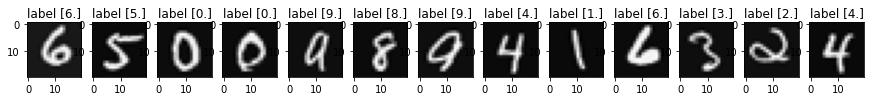

In [59]:
plt.figure(figsize=(15, 8))
for i in range(13):
    c = random.randint(X.shape[0])
    a = X[c, 1:].reshape((20, 20))
    a = np.transpose(a)
    plt.subplot(1, 13, i+1)
    plt.title('label ' + str(y[c]))
    plt.imshow(a, cmap='gray')


Transformer y de tel sorte à avoir un vecteur pour chaque exemple

Equivalent de tocategorical


In [60]:
# Xt, Xtt, Yt, Ytt = train_test_split(X, y, test_size = 0.33)
YY = np.zeros((y.shape[0], int(np.max(y))+1))
YY.shape


(5000, 10)

In [61]:
for i in range(YY.shape[0]):
    YY[i, int(y[i])] = 1


# Réseaux de neurones

Pour cette partie, nous choisissons une réseau simple:

- une couche d'entrée avec 400 noeuds (20 x 20 pixels) + le biais
- une couche cachée avec 25 noeuds
- une couche de sortie avec 10 noeuds (nombre de classes)


In [62]:
# poids de la couche 1
W1 = np.genfromtxt('W1.csv', delimiter=',', dtype=float)
W1.shape


(25, 401)

In [63]:
# poids de la couche 2
W2 = np.genfromtxt('W2.csv', delimiter=',', dtype=float)
W2.shape


(10, 26)

In [64]:
input_layer_size = 400
hidden_layer_size = 25
num_labels = 10


# Calcul du coût


# TODO 1 calcul du coût

**Tâche 1**: Modifier la fonction computeCost afin d'obtenir un coût avec régularisation

Rappelons que le coût avec régularisation est calculé comme suit:

$ J(\theta)= \frac{1}{m} \sum*{i=1}^m\sum*{k=1}^K \left[ -y_k^{(i)} \log (h_\theta(x^{(i)}) )_k - (1-y_k^{(i)}) \log (1-h_\theta(x^{(i)}) )_k \right] + \frac{\lambda}{2m} \left[ \sum_{j=1}^{25}\sum_{k=1}^{400} \left( \theta_{j,k}^{(1)} \right)^2 + \sum_{j=1}^{10}\sum_{k=1}^{25} \left( \theta_{j,k}^{(2)} \right)^2 \right] $


In [65]:
def Sigmoid(z):
    # pour une valeur donnée, cette fonction calculera sa sigmoid
    return 1/(1+np.exp(-z))


In [66]:
def computeCost(X, YY, theta1, theta2, hidden_layer_size):
    a1 = X

    z2 = np.zeros((X.shape[0], hidden_layer_size))
    a2 = np.zeros((X.shape[0], hidden_layer_size))

    intercept = np.ones((X.shape[0], 1))
    z2 = np.column_stack((intercept, np.matmul(a1, np.transpose(theta1))))
    a2 = Sigmoid(z2)
    a2[:, 0] = 1

    z3 = np.zeros((YY.shape[0], YY.shape[1]))
    a3 = np.zeros((YY.shape[0], YY.shape[1]))

    z3 = np.matmul(a2, np.transpose(theta2))
    a3 = Sigmoid(z3)

    J = np.zeros((YY.shape[0], 1))
    # calculate predictions
    J = -np.sum(np.sum(YY * np.log(a3) + (1-YY) * np.log(1 - a3))) / X.shape[0]

    return J


# TODO 2 calcul du gradient

**Tâche 2**: Implémenter la fonction NNCostFunction afin de retourner:

- Le coût avec régularisation
- Le gardient du coût par rapport à chaqu'un des paramètres du réseau

Rappelons le gradient de la sigmoid:

$ sigmoid(z) =\sigma(z)= \frac{1}{1-e^{-z}}$

$ \sigma(z)^\prime = \sigma(z)(1-\sigma(z)) =a(1-a)$ tel que $a$ est l'activation d'une couche donnée

L'algorithme à implementer est comme suit:

Pour chaque exemple de l'ensemble d'apprentissage faire

Pour chaque noeud de la couche de sortie, calculer la dérivée (gradient):

$\delta_k^{(3)} = \left( a_k^{(3)}- y_k \right) $

Pour chaque noeud de la couche caché calculer la dérivée (gradient):

$\delta^{(2)} = \left(\Theta^{(2)}\right)^T \delta^{(3)} \quad .\* \quad \sigma^\prime\left(z^{(2)} \right) $

Notons que l'opérateur $.*$ represente la multiplication élement par élement et non pas la multiplication matricielle

Le gradient de chaque noeud et de chaque couche sera finalement:

$\Delta^{(l)} = \Delta^{(l)} + \delta^{(l)} \* \left( a^{(l)} \right)^T $

Fin pour

Fin pour

Diviser le gradient cumulé par le nombre d'exemples:

$ \frac{\partial J(\Theta)} { \partial \Theta*{i,j)}^{(l)}} = \frac{1}{m} \Delta*{i,j)}^{(l)}$


In [67]:
def NNCostFunction(X, YY, theta1, theta2, hidden_layer_size):
    global costs
    
    theta1_grad = np.zeros((theta1.shape[0], theta1.shape[1]))
    theta2_grad = np.zeros((theta2.shape[0], theta2.shape[1]))

    m = np.size(X, 0)
    J = computeCost(X, YY, theta1, theta2, hidden_layer_size)
    costs.append(J)

    a1 = np.r_[np.ones((0, m), dtype=float), X.T]

    z2 = np.dot(theta1, a1)
    a2 = np.r_[np.ones((1, m), dtype=float), Sigmoid(z2)]

    a3 = Sigmoid(np.dot(theta2, a2))
    d3 = a3 - YY.T

    d2 = (np.dot(theta2.conj().T, d3)) * \
        np.r_[np.ones((1, m), dtype=float), Sigmoid(z2)
              * (1 - Sigmoid(z2))]

    # Vectorized ftw:
    theta2_grad += (1/m) * np.dot(d3, a2.T)
    theta1_grad += (1/m) * np.dot(d2[1:, :], a1.T)
    
    return J, theta1_grad, theta2_grad


# TODO 3 entrainement du réseau

**Tâche 3**: Entrainer le réseau en utilisant la descente du gradient:
Ici il faudra reprendre l'algorithme de la descente du gradient afin de mettre à jour les paramètres du réseau


In [68]:
def gradientDescent(X, YY, theta1, theta2, alpha, iterations):
    for i in range(iterations):
        J, theta1_grad, theta2_grad = NNCostFunction(X, YY, theta1, theta2, hidden_layer_size)
        theta1 -= alpha*theta1_grad
        theta2 -= alpha*theta2_grad
    return theta1, theta2


Loss :  0.06882903393030963


Text(0, 0.5, 'Loss')

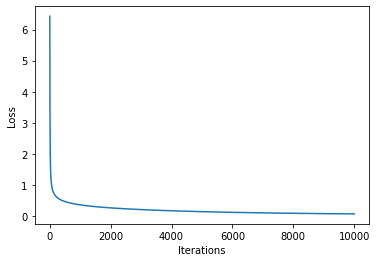

In [69]:
# plot
iterations = 10000
alpha = 0.5
costs = []
theta1, theta2 = gradientDescent(X, YY, W1, W2, alpha, iterations)
print('Loss : ', costs[-1])
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Loss')


# TODO 4 : Régularisation

Mettre à jour le calcul du coût en ajoutant le terme de régularisation et comparer les résultats (avec et sans régularisation)


In [70]:
def computeCostRegularized(X, YY, theta1, theta2, hidden_layer_size, lambda_):
    a1 = X

    z2 = np.zeros((X.shape[0], hidden_layer_size))
    a2 = np.zeros((X.shape[0], hidden_layer_size))

    intercept = np.ones((X.shape[0], 1))
    z2 = np.column_stack((intercept, np.matmul(a1, np.transpose(theta1))))
    a2 = Sigmoid(z2)
    a2[:, 0] = 1

    z3 = np.zeros((YY.shape[0], YY.shape[1]))
    a3 = np.zeros((YY.shape[0], YY.shape[1]))

    z3 = np.matmul(a2, np.transpose(theta2))
    a3 = Sigmoid(z3)

    J = np.zeros((YY.shape[0], 1))
    J = (1/y.shape[0]) * (np.sum(np.sum((-YY*np.log(a3))-((1-YY)*np.log(1-a3)))))
    J += (lambda_ / (2*y.shape[0])) * np.sum(np.sum(theta1[:, 1:] ** 2))
    J += (lambda_ / (2*y.shape[0])) * np.sum(np.sum(theta2[:, 1:] ** 2))

    return J


In [71]:
def NNCostFunctionRegularized(X, YY, theta1, theta2, hidden_layer_size, lambda_):
    global costs
    # theta1 = W1 et theta2=W2
    theta1_grad = np.zeros((theta1.shape[0], theta1.shape[1]))
    theta2_grad = np.zeros((theta2.shape[0], theta2.shape[1]))

    m = np.size(X, 0)
    J = computeCostRegularized(
        X, YY, theta1, theta2, hidden_layer_size, lambda_)
    costs.append(J)

    a1 = np.r_[np.ones((0, m), dtype=float), X.T]

    z2 = np.dot(theta1, a1)
    a2 = np.r_[np.ones((1, m), dtype=float), Sigmoid(z2)]

    a3 = Sigmoid(np.dot(theta2, a2))
    d3 = a3 - YY.T

    d2 = (np.dot(theta2.conj().T, d3)) * \
        np.r_[np.ones((1, m), dtype=float), Sigmoid(z2) * (1-Sigmoid(z2))]

    theta2_grad += (1/m) * np.dot(d3, a2.T)
    theta1_grad += (1/m) * np.dot(d2[1:, :], a1.T)

    theta2_grad += (lambda_ / m) * (np.c_[np.zeros((np.size(theta2, 0), 1), dtype=float), theta2[:, 1:]])
    theta1_grad += (lambda_ / m) * (np.c_[np.zeros((np.size(theta1, 0), 1), dtype=float), theta1[:, 1:]])

    return J, theta1_grad, theta2_grad


In [72]:
def gradientDescentRegularized(X, YY, theta1, theta2, alpha, iterations, lambda_):
    for i in range(iterations):
        J, theta1_grad, theta2_grad = NNCostFunctionRegularized(X, YY, theta1, theta2, hidden_layer_size, lambda_)
        theta1 -= alpha*theta1_grad
        theta2 -= alpha*theta2_grad
    return theta1, theta2


Loss :  0.0366478680041379


Text(0, 0.5, 'Loss')

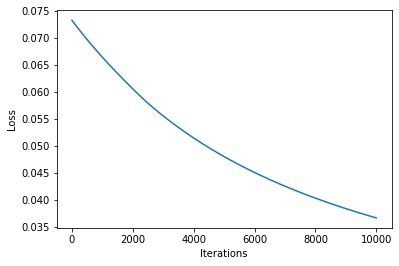

In [73]:
# plot
iterations = 10000
alpha = 0.5
lambda_ = 0.012
costs = []
theta1_reg, theta2_reg = gradientDescentRegularized(X, YY, W1, W2, alpha, iterations, lambda_)
print('Loss : ', costs[-1])
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Loss')


# TODO 5 : Prédiction

Appliquer une propagation en avant en utilisant les paramètres données pour prédir les classes de l'ensemble d'apprentissage.


In [74]:
def predict(theta1, theta2, X):
    # feed forward
    a1 = X

    z2 = np.zeros((X.shape[0], hidden_layer_size))
    a2 = np.zeros((X.shape[0], hidden_layer_size))

    intercept = np.ones((X.shape[0], 1))
    z2 = np.column_stack((intercept, np.matmul(a1, np.transpose(theta1))))
    a2 = Sigmoid(z2)
    a2[:, 0] = 1

    z3 = np.zeros((YY.shape[0], YY.shape[1]))
    a3 = np.zeros((YY.shape[0], YY.shape[1]))

    z3 = np.matmul(a2, np.transpose(theta2))
    a3 = Sigmoid(z3)
    y_pred = np.argmax(a3, axis=1)
    y_pred = y_pred.reshape(y_pred.shape[0], 1)

    return y_pred


In [75]:
# calcul de precision = nombre de valeurs bien prédites (ici sur toute la base X)
y_pred = predict(theta1, theta2, X)
precision = np.mean(y == y_pred)*100

reg_y_pred = predict(theta1_reg, theta2_reg, X)
reg_precision = np.mean(y == reg_y_pred)*100


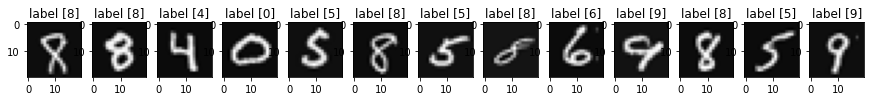

In [76]:
plt.figure(figsize=(15, 8))
for i in range(13):
    c = random.randint(X.shape[0])
    a = X[c, 1:].reshape((20, 20))
    a = np.transpose(a)
    plt.subplot(1, 13, i+1)
    plt.title('label ' + str(y_pred[c]))
    plt.imshow(a, cmap='gray')


# optionnel 1 : Vérification de l'implementation

Comparer vos algorithmes à ceux de scikitlearn


In [77]:
model = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(25), max_iter=100000)
Xt, Xtt, yt, ytt = train_test_split(X, y.reshape(y.shape[0]), random_state=0, test_size=0.3)
model.fit(Xt, yt)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=25, max_iter=100000, solver='sgd')

In [78]:
model_y_pred = model.predict(Xtt)
model_precision = np.mean(ytt == model_y_pred)*100
print("Normal precision:", precision)
print("Regularised precision:", reg_precision)
print("MLPClassifier precision:", model_precision)


Normal precision: 99.98
Regularised precision: 99.98
MLPClassifier precision: 91.93333333333334


# Optionnel 2 : Visualisation des poids

La visualisation de poids permet de voir quel partie du réseau est activé et pour quelle classe.
Il est possible de visulaiser les paramètres theta1 .
Ceci peut se faire en utilisant un reshape de ces paramètres afin d'avoir 25 images de taille 20x20 (n'oubliez pas d'ignorer la premuère colonne, celle du biais)


# Optionnel 3 : Renforcement de l'apprentissage

Mettre ici toute idée qui pourrait renforcer votre apprentissage


# Consignes


Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 29Avril 2022 à 22h


In [86]:
# bonne chance
